In [3]:
#load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix

In [4]:
import pandas as pd
# defining file path 
path="../../Data/cancer/cancer.csv"

#define names
names = ["sample_id", "patient_cohort", "sample_origin", "age", "sex", "diagnosis","stage", "benign_sample_diagnosis", "plasma_CA19_9", "creatinine","LYVE1", "REG1B", "TFF1", "REG1A"]
# Load data in pandas dataframe
cancer_data = pd.read_csv(path, names=names )

In [5]:
# take a peak at the dataset
print(cancer_data.head(20))



    sample_id  patient_cohort  sample_origin  age  sex  diagnosis  stage  \
0   sample_id  patient_cohort  sample_origin  age  sex  diagnosis  stage   
1          S1         Cohort1           BPTB   33    F          1    NaN   
2         S10         Cohort1           BPTB   81    F          1    NaN   
3        S100         Cohort2           BPTB   51    M          1    NaN   
4        S101         Cohort2           BPTB   61    M          1    NaN   
5        S102         Cohort2           BPTB   62    M          1    NaN   
6        S103         Cohort2           BPTB   53    M          1    NaN   
7        S104         Cohort2           BPTB   70    M          1    NaN   
8        S105         Cohort2           BPTB   58    F          1    NaN   
9        S106         Cohort2           BPTB   59    F          1    NaN   
10       S107         Cohort2           BPTB   56    F          1    NaN   
11       S108         Cohort2           BPTB   77    F          1    NaN   
12       S10

In [6]:
#show data shape
print(cancer_data.shape)

(591, 14)


In [7]:
# obtain count, mean, min, max, and percentiles 
print(cancer_data.describe())

        sample_id patient_cohort sample_origin  age  sex diagnosis stage  \
count         591            591           591  591  591       591   200   
unique        591              3             5   64    3         4     9   
top     sample_id        Cohort1          BPTB   68    F         2   III   
freq            1            332           409   21  299       208    76   

       benign_sample_diagnosis plasma_CA19_9 creatinine       LYVE1 REG1B  \
count                      209           351        591         591   591   
unique                      53           267        199         536   581   
top               Pancreatitis            11    0.57681  0.00081432  2.45   
freq                        41             8         11           5     2   

              TFF1 REG1A  
count          591   307  
unique         561   299  
top     0.02470104     0  
freq             4     7  


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Check for missing values
print("\nMissing values per column:\n")
print(cancer_data.isnull().sum())



Missing values per column:

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64


In [10]:
# 2. Summary stats for categorical variables
print("\nSummary statistics for categorical columns:\n")
print(cancer_data.describe(include=['object']))


Summary statistics for categorical columns:

        sample_id patient_cohort sample_origin  age  sex diagnosis stage  \
count         591            591           591  591  591       591   200   
unique        591              3             5   64    3         4     9   
top     sample_id        Cohort1          BPTB   68    F         2   III   
freq            1            332           409   21  299       208    76   

       benign_sample_diagnosis plasma_CA19_9 creatinine       LYVE1 REG1B  \
count                      209           351        591         591   591   
unique                      53           267        199         536   581   
top               Pancreatitis            11    0.57681  0.00081432  2.45   
freq                        41             8         11           5     2   

              TFF1 REG1A  
count          591   307  
unique         561   299  
top     0.02470104     0  
freq             4     7  


In [9]:
# 3. Distribution of diagnosis classes
print("\nDiagnosis class counts:\n")
print(cancer_data['diagnosis'].value_counts())


Diagnosis class counts:

diagnosis
2            208
3            199
1            183
diagnosis      1
Name: count, dtype: int64


C:\Users\aws_1\AppData\Local\Temp\ipykernel_28428\2767495760.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Diagnosis Class')


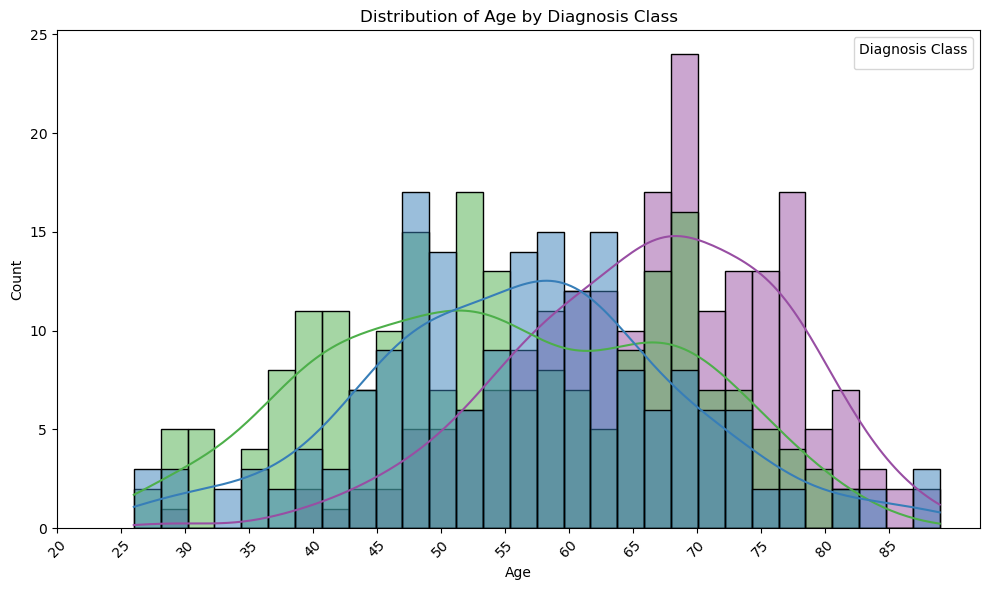

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 4. Distribution of age by diagnosis class
plt.figure(figsize=(10, 6))
sns.histplot(data=cancer_data, x='age', hue='diagnosis', bins=30, kde=True, palette="Set1", edgecolor="black")

plt.title("Distribution of Age by Diagnosis Class")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='Diagnosis Class')

# Clean up x-axis
plt.xticks(np.arange(20, 90, 5), rotation=45)  # adjust range and step as needed

plt.tight_layout()
plt.show()

In [12]:
# List of numeric features to analyze
numeric_features = ['age', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']

# Convert to numeric, forcing errors to NaN
for col in numeric_features:
    cancer_data[col] = pd.to_numeric(cancer_data[col], errors='coerce')

# Drop rows with missing values in numeric columns
clean_data = cancer_data[numeric_features].dropna()

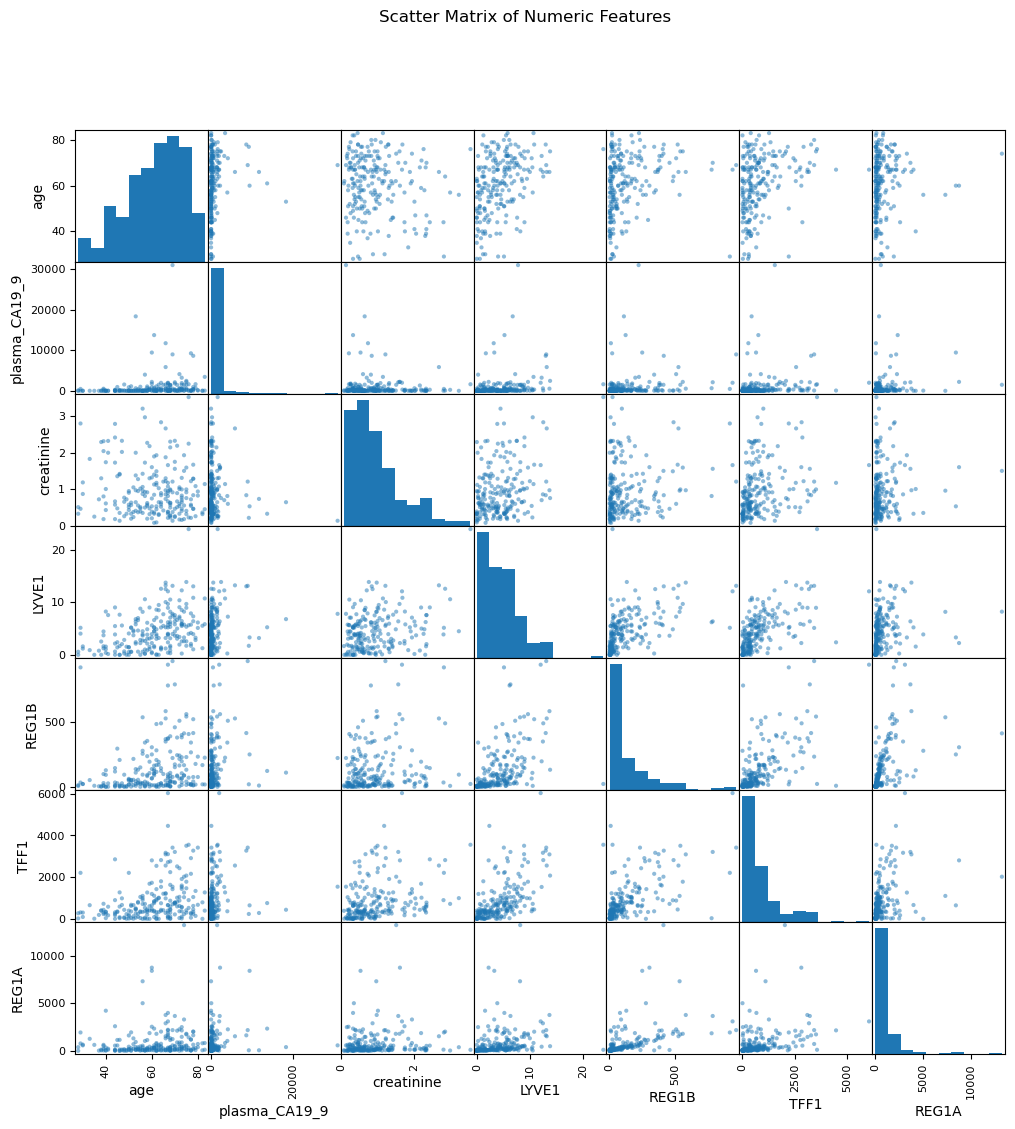

In [13]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
#make scatter plot
scatter_matrix(clean_data, figsize=(12, 12))
plt.suptitle("Scatter Matrix of Numeric Features")
plt.show()

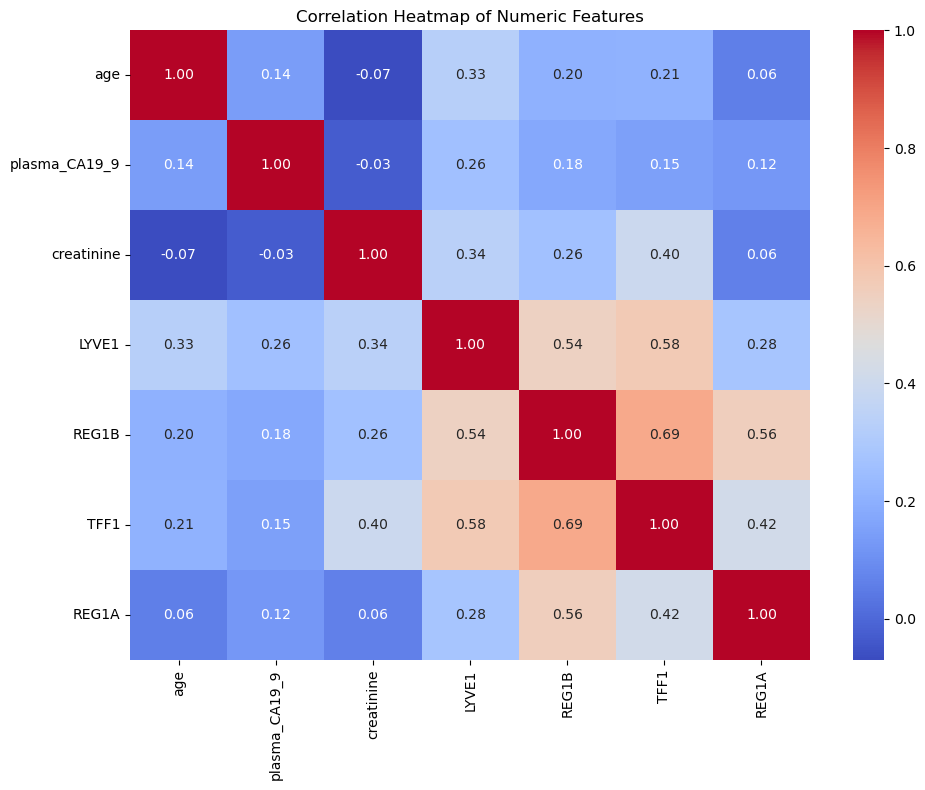

In [14]:
# 6. Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cancer_data[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

In [20]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Drop unnecessary columns
drop_cols = ['patient_cohort', 'sample_origin', 'sex', 'stage', 'plasma_CA19_9', 'sample_id', 'benign_sample_diagnosis']
clean_data = cancer_data.drop(columns=drop_cols)

# Step 2: Encode target variable
# Assuming diagnosis has string labels, encode them to numbers
clean_data['diagnosis'] = clean_data['diagnosis'].astype('category').cat.codes

# Step 3: Prepare dataset WITH age
features_with_age = clean_data.drop(columns=['diagnosis'])
labels = clean_data['diagnosis']

# Step 4: Prepare dataset WITHOUT age
features_without_age = features_with_age.drop(columns=['age'])

# Step 5: Train/test split
X_train_with_age, X_test_with_age, y_train, y_test = train_test_split(features_with_age, labels, test_size=0.2, random_state=42)
X_train_without_age, X_test_without_age, _, _ = train_test_split(features_without_age, labels, test_size=0.2, random_state=42)

# Step 6: Train both models
model_with_age = RandomForestClassifier(random_state=42)
model_without_age = RandomForestClassifier(random_state=42)

model_with_age.fit(X_train_with_age, y_train)
model_without_age.fit(X_train_without_age, y_train)

# Step 7: Make predictions
preds_with_age = model_with_age.predict(X_test_with_age)
preds_without_age = model_without_age.predict(X_test_without_age)

# Step 8: Evaluate
print("=== Model WITH Age ===")
print("Accuracy:", accuracy_score(y_test, preds_with_age))
print(classification_report(y_test, preds_with_age))

print("\n=== Model WITHOUT Age ===")
print("Accuracy:", accuracy_score(y_test, preds_without_age))
print(classification_report(y_test, preds_without_age))

=== Model WITH Age ===
Accuracy: 0.6722689075630253
              precision    recall  f1-score   support

           0       0.69      0.64      0.67        39
           1       0.62      0.58      0.60        43
           2       0.70      0.81      0.75        37

    accuracy                           0.67       119
   macro avg       0.67      0.68      0.67       119
weighted avg       0.67      0.67      0.67       119


=== Model WITHOUT Age ===
Accuracy: 0.6722689075630253
              precision    recall  f1-score   support

           0       0.74      0.72      0.73        39
           1       0.63      0.56      0.59        43
           2       0.65      0.76      0.70        37

    accuracy                           0.67       119
   macro avg       0.67      0.68      0.67       119
weighted avg       0.67      0.67      0.67       119



In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# START with raw data, then drop everything *except* sex for this experiment
drop_cols = ['patient_cohort', 'sample_origin', 'stage', 'plasma_CA19_9', 'sample_id', 'benign_sample_diagnosis']
data_sex_test = cancer_data.drop(columns=drop_cols)

# Encode categorical variables
# Encode 'diagnosis' as target
data_sex_test['diagnosis'] = data_sex_test['diagnosis'].astype('category').cat.codes

# Encode 'sex' if it's not already numeric
if data_sex_test['sex'].dtype == 'object':
    data_sex_test['sex'] = data_sex_test['sex'].astype('category').cat.codes

# Define features and label
features_with_sex = data_sex_test.drop(columns=['diagnosis'])
labels = data_sex_test['diagnosis']

# Create version without sex
features_without_sex = features_with_sex.drop(columns=['sex'])

# Train/test split
X_train_with_sex, X_test_with_sex, y_train, y_test = train_test_split(features_with_sex, labels, test_size=0.2, random_state=42)
X_train_without_sex, X_test_without_sex, _, _ = train_test_split(features_without_sex, labels, test_size=0.2, random_state=42)

# Train models
model_with_sex = RandomForestClassifier(random_state=42)
model_without_sex = RandomForestClassifier(random_state=42)

model_with_sex.fit(X_train_with_sex, y_train)
model_without_sex.fit(X_train_without_sex, y_train)

# Make predictions
preds_with_sex = model_with_sex.predict(X_test_with_sex)
preds_without_sex = model_without_sex.predict(X_test_without_sex)

# Evaluate
print("=== Model WITH Sex ===")
print("Accuracy:", accuracy_score(y_test, preds_with_sex))
print(classification_report(y_test, preds_with_sex))

print("\n=== Model WITHOUT Sex ===")
print("Accuracy:", accuracy_score(y_test, preds_without_sex))
print(classification_report(y_test, preds_without_sex))

=== Model WITH Sex ===
Accuracy: 0.6638655462184874
              precision    recall  f1-score   support

           0       0.70      0.67      0.68        39
           1       0.59      0.53      0.56        43
           2       0.70      0.81      0.75        37

    accuracy                           0.66       119
   macro avg       0.66      0.67      0.67       119
weighted avg       0.66      0.66      0.66       119


=== Model WITHOUT Sex ===
Accuracy: 0.6722689075630253
              precision    recall  f1-score   support

           0       0.69      0.64      0.67        39
           1       0.62      0.58      0.60        43
           2       0.70      0.81      0.75        37

    accuracy                           0.67       119
   macro avg       0.67      0.68      0.67       119
weighted avg       0.67      0.67      0.67       119



In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Step 1: Drop unnecessary columns, keep age for this experiment
drop_cols = ['patient_cohort', 'sample_origin', 'stage', 'plasma_CA19_9', 'sample_id', 'benign_sample_diagnosis']
data_age_test = cancer_data.drop(columns=drop_cols)

# Step 2: Encode categorical features
data_age_test['diagnosis'] = data_age_test['diagnosis'].astype('category').cat.codes

if data_age_test['sex'].dtype == 'object':
    data_age_test['sex'] = data_age_test['sex'].astype('category').cat.codes

# Step 3: Define features and target
features_with_age = data_age_test.drop(columns=['diagnosis'])
labels = data_age_test['diagnosis']

# Step 4: Create version without 'age'
features_without_age = features_with_age.drop(columns=['age'])

# Step 5: Train/test split
X_train_with_age, X_test_with_age, y_train, y_test = train_test_split(features_with_age, labels, test_size=0.2, random_state=42)
X_train_without_age, X_test_without_age, _, _ = train_test_split(features_without_age, labels, test_size=0.2, random_state=42)

# Step 6: Train XGBoost models
model_with_age = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model_without_age = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

model_with_age.fit(X_train_with_age, y_train)
model_without_age.fit(X_train_without_age, y_train)

# Step 7: Make predictions
preds_with_age = model_with_age.predict(X_test_with_age)
preds_without_age = model_without_age.predict(X_test_without_age)

# Step 8: Evaluate
print("=== XGBoost Model WITH Age ===")
print("Accuracy:", accuracy_score(y_test, preds_with_age))
print(classification_report(y_test, preds_with_age))

print("\n=== XGBoost Model WITHOUT Age ===")
print("Accuracy:", accuracy_score(y_test, preds_without_age))
print(classification_report(y_test, preds_without_age))

c:\Users\aws_1\anaconda.python.official\envs\iRI_2025_AS\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:19:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\aws_1\anaconda.python.official\envs\iRI_2025_AS\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:19:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost Model WITH Age ===
Accuracy: 0.6302521008403361
              precision    recall  f1-score   support

           0       0.65      0.56      0.60        39
           1       0.57      0.53      0.55        43
           2       0.67      0.81      0.73        37

    accuracy                           0.63       119
   macro avg       0.63      0.64      0.63       119
weighted avg       0.63      0.63      0.63       119


=== XGBoost Model WITHOUT Age ===
Accuracy: 0.6134453781512605
              precision    recall  f1-score   support

           0       0.68      0.67      0.68        39
           1       0.51      0.47      0.49        43
           2       0.64      0.73      0.68        37

    accuracy                           0.61       119
   macro avg       0.61      0.62      0.62       119
weighted avg       0.61      0.61      0.61       119



In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Drop columns not being used in model
drop_common = ['sample_id', 'patient_cohort', 'sample_origin', 'sex', 'stage', 'plasma_CA19_9', 'benign_sample_diagnosis']

# Target: diagnosis (encoded)
target = cancer_data['diagnosis'].astype('category').cat.codes